### Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
### Colaboração: Adriano Santos
# <font color=red>Regressão linear múltipla</font>
#### O arquivo `mt_cars.csv` contém uma tabela com especificações técnicas detalhadas de vários modelos de carros. As informações estão formatadas em linhas e colunas, seguindo o padrão CSV para possibilitar melhor processamento e análise computacional dos dados. Cada linha representa um modelo, com suas características descritas em colunas, como consumo, motorização, potência etc. Dessa forma, estrutura-se um catálogo digital de modelos de automóveis, com atributos padronizados que permitem estudar ou comparar individualmente cada carro com mais praticidade. O objetivo é trazer informações abundantes e organizadas sobre veículos para consulta.

### <font color=orange>Importando as Bibliotecas Importantes</font>

* Esse código em Python começa importando bibliotecas essenciais, como `Pandas` para manipulação de dados, `NumPy` para cálculos numéricos, `Matplotlib` para visualização de gráficos e `Scikit-Learn` para a regressão linear. Em seguida, ele importa a biblioteca `StatsModels` para análise estatística. O código é usado para realizar uma análise de regressão linear, um método estatístico para modelar a relação entre variáveis.

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
%matplotlib inline

### <font color=orange>Carregando e Visualizando a Base de Dados</font>

* Nesse código em Python, estamos utilizando a biblioteca Pandas para carregar um conjunto de dados de um arquivo CSV chamado '`mt_cars.csv`' que está localizado no diretório '../dados/'. O método '`pd.read_csv`' lê o arquivo e cria um DataFrame, que é uma estrutura de dados tabular. Em seguida, chamamos '`base.shape`' para obter as dimensões desse DataFrame, ou seja, o número de linhas e colunas. Isso nos fornece informações básicas sobre o tamanho do conjunto de dados, úteis para análise posterior.

In [157]:
base = pd.read_csv('../dados/mt_cars.csv')
base.shape

(32, 12)

* O código "`base.head()`" é uma instrução utilizada em Python para exibir as primeiras linhas de um conjunto de dados, geralmente em formato de tabela, como um DataFrame do Pandas. Essa função ajuda a visualizar rapidamente os primeiros registros do conjunto, fornecendo uma amostra dos dados para avaliação inicial. É uma ferramenta útil para verificar a estrutura e os primeiros valores de um dataset, o que é fundamental na análise de dados e desenvolvimento de projetos de Business Intelligence (BI).

In [158]:
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


A tabela acima mostra as características de 5 carros diferentes. As colunas da tabela representam os seguintes atributos dos carros:
<br/>
* mpg - Milhas por galão (gas mileage)
* cyl - Número de cilindros do motor
* disp - Cilindrada do motor (em litros)
* hp - Potência do motor (em cavalos de potência)
* drat - Relação de peso-potência (peso do carro em libras dividido pela potência do motor em cavalos de potência)
* wt - Peso do carro (em libras)
* qsec - Tempo de uma volta de ¼ de milha (em segundos)
* vs - Válvula de série (0 para não, 1 para sim)
* am - Transmissão automática (0 para não, 1 para sim)
* gear - Número de marchas da transmissão
* carb - Número de carburadores
<br/><br/>
A primeira linha da tabela é o cabeçalho, que identifica os atributos dos carros. As linhas restantes são os dados, que mostram os valores dos atributos para cada carro. Por exemplo, o carro Mazda RX4 tem 21 mpg, 6 cilindros, 160 litros de cilindrada, 110 cavalos de potência, uma relação de peso-potência de 3.90, um peso de 2.620 libras, um tempo de ¼ de milha de 16.46 segundos, uma válvula de série, uma transmissão automática, 4 marchas e 4 carburadores. Isto é apenas uma explicação básica da tabela. Para uma análise mais aprofundada, você pode calcular estatísticas descritivas para os dados, como a média, a mediana, o desvio padrão, etc. 

### <font color=orange>Renomeando o Babeçalho das Colunas do DataFrame</font>

* No código Python fornecido, as colunas do DataFrame '`base`' estão sendo renomeadas para facilitar a compreensão. As novas colunas incluem informações sobre o modelo, consumo, cilindros, tipo de motor, potência, eixo, peso, tempo de quarto de milha, variação de motor, se é automático, número de marchas e quantidade de carburadores. O método '`head(35)`' é utilizado para exibir as primeiras linhas do DataFrame, oferecendo uma rápida visão geral dos dados recém-formatados. Nesse caso, é exibido 31 linhas do DataFrame, pois é o número máximo de linhas existentes no momento.

In [159]:
base.columns = [ "Modelo", "Consumo", "Cilindros", "Motor", "Potencia", "Eixo", "Peso", "Tempo_Quarto_Milha", "Motor_VS", "Automatica", "Marchas", "Carburadores"]
base.head(35)

,Modelo,Consumo,Cilindros,Motor,Potencia,Eixo,Peso,Tempo_Quarto_Milha,Motor_VS,Automatica,Marchas,Carburadores
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


### <font color=orange>Realizando a Análise Estatística da Base de Dados</font>

* O código "`base.describe()`" em Python utiliza o método "`describe`" de bibliotecas como Pandas para gerar estatísticas descritivas da base de dados. Esse comando fornece informações valiosas, como média, desvio padrão, mínimo, máximo e quartis, facilitando a compreensão geral das características numéricas da tabela. É uma ferramenta eficaz para explorar e resumir dados, contribuindo para uma análise mais rápida e precisa.

In [160]:
base.describe()

,Consumo,Cilindros,Motor,Potencia,Eixo,Peso,Tempo_Quarto_Milha,Motor_VS,Automatica,Marchas,Carburadores
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [161]:
base.describe().round()

,Consumo,Cilindros,Motor,Potencia,Eixo,Peso,Tempo_Quarto_Milha,Motor_VS,Automatica,Marchas,Carburadores
count,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0
mean,20.0,6.0,231.0,147.0,4.0,3.0,18.0,0.0,0.0,4.0,3.0
std,6.0,2.0,124.0,69.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0
min,10.0,4.0,71.0,52.0,3.0,2.0,14.0,0.0,0.0,3.0,1.0
25%,15.0,4.0,121.0,96.0,3.0,3.0,17.0,0.0,0.0,3.0,2.0
50%,19.0,6.0,196.0,123.0,4.0,3.0,18.0,0.0,0.0,4.0,2.0
75%,23.0,8.0,326.0,180.0,4.0,4.0,19.0,1.0,1.0,4.0,4.0
max,34.0,8.0,472.0,335.0,5.0,5.0,23.0,1.0,1.0,5.0,8.0


* No código abaixo, a função "`dtypes`" é utilizada no DataFrame "`base`" para retornar os tipos de dados de cada coluna. Essa função é útil para verificar se as variáveis estão sendo interpretadas corretamente, facilitando a compreensão da estrutura do conjunto de dados. O resultado fornecido pelo código será uma lista com os tipos de dados associados a cada coluna presente no DataFrame. Essa informação é valiosa para análise e manipulação adequada dos dados, garantindo consistência e precisão nas operações realizadas.

In [162]:
base.dtypes

Modelo                 object
Consumo               float64
Cilindros               int64
Motor                 float64
Potencia                int64
Eixo                  float64
Peso                  float64
Tempo_Quarto_Milha    float64
Motor_VS                int64
Automatica              int64
Marchas                 int64
Carburadores            int64
dtype: object

* O código seguinte, apresenta a função `info()` aplicada ao objeto `base`, fornecendo informações detalhadas sobre cada coluna no conjunto de dados. Essa função é comumente utilizada para obter uma visão geral, exibindo o número de entradas não nulas, o tipo de dado de cada coluna e a quantidade de memória usada. Essa abordagem simples e direta permite uma rápida compreensão da estrutura do conjunto de dados, facilitando análises subsequentes.

In [163]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Modelo              32 non-null     object 
 1   Consumo             32 non-null     float64
 2   Cilindros           32 non-null     int64  
 3   Motor               32 non-null     float64
 4   Potencia            32 non-null     int64  
 5   Eixo                32 non-null     float64
 6   Peso                32 non-null     float64
 7   Tempo_Quarto_Milha  32 non-null     float64
 8   Motor_VS            32 non-null     int64  
 9   Automatica          32 non-null     int64  
 10  Marchas             32 non-null     int64  
 11  Carburadores        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


* O código a seguir, verifica se há algum valor nulo no dataframe '`base`' e, em caso afirmativo, conta a quantidade de células em branco. A função '`isna()`' retorna uma matriz booleana indicando a presença de valores nulos em cada célula, e '`sum()`' adiciona esses valores, fornecendo assim a contagem total de células nulas no conjunto de dados. Essa abordagem é útil para identificar e lidar com valores ausentes em análises de dados, contribuindo para a integridade dos resultados.

In [164]:
base.isna().sum()

Modelo                0
Consumo               0
Cilindros             0
Motor                 0
Potencia              0
Eixo                  0
Peso                  0
Tempo_Quarto_Milha    0
Motor_VS              0
Automatica            0
Marchas               0
Carburadores          0
dtype: int64

* No código seguinte, a função `value_counts()` é aplicada à coluna "Motor_VS" do dataframe "base", buscando determinar a frequência de cada categoria presente nessa coluna. Essa função retorna uma contagem de ocorrências únicas, revelando insights sobre a distribuição dos valores na referida coluna, o que pode ser crucial para análises estatísticas e tomada de decisões no contexto de Business Intelligence.

In [165]:
base.Motor_VS.value_counts()

0    18
1    14
Name: Motor_VS, dtype: int64

* No código a seguir, estamos utilizando a biblioteca pandas para criar um gráfico de barras da contagem dos valores únicos na coluna "Motor_VS" do DataFrame chamado "base". A função `value_counts()` realiza a contagem e `plot(kind='bar')` gera o gráfico de barras. Essa visualização fornece uma representação clara da distribuição dos valores na coluna "Motor_VS", facilitando a análise e interpretação dos dados.

<Axes: >

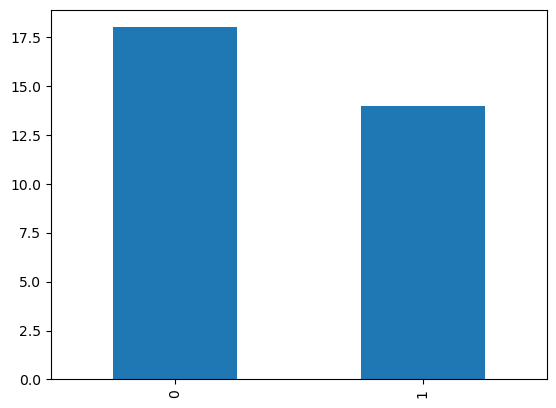

In [166]:
base.Motor_VS.value_counts().plot(kind='bar')
plt.title('Distribuição do Número de Machas')

* O código seguinte em questão, utilizamos o método `value_counts()` para contar a frequência de cada categoria na coluna "`Marchas`" do DataFrame chamado "`base`". Essa função é útil para análise de dados, fornecendo uma contagem rápida e eficiente das ocorrências de cada valor na mencionada coluna, facilitando a compreensão da distribuição das marchas no conjunto de dados.

In [143]:
base.Marchas.value_counts()

3    15
4    12
5     5
Name: Marchas, dtype: int64

* No código seguinte, criamos um gráfico de pizza (pie chart) para visualizar a distribuição da coluna "`Marchas`" no conjunto de dados representado pela variável '`base`'. A função '`value_counts()`' conta o número de ocorrências de cada valor na coluna, e em seguida, '`plot(kind='pie)`'' gera o gráfico de pizza correspondente, exibindo as proporções de cada categoria de marcha de forma visualmente representativa. Esse código é útil para analisar a distribuição relativa das marchas no conjunto de dados.

Text(0.5, 1.0, 'Distribuição do Número de Machas')

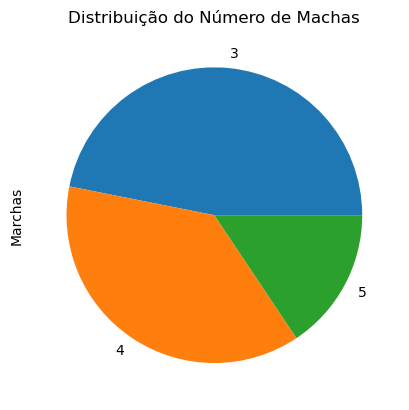

In [147]:
base.Marchas.value_counts().plot(kind='pie')
plt.title('Distribuição do Número de Machas')

* Nos códigos seguintes, realizamos as operações de encontrar os valores mínimo e máximo para cada coluna em um conjunto de dados representado pela variável '`base`'. Utilizando o método '`min()` e `max()`'. Essas funções retornam uma série contendo os valores mínimos e máximos de cada coluna no conjunto de dados, oferecendo uma visão rápida e concisa dos valores mínimos e máximos em todas as colunas.

In [167]:
base.min()

Modelo                AMC Javelin
Consumo                      10.4
Cilindros                       4
Motor                        71.1
Potencia                       52
Eixo                         2.76
Peso                        1.513
Tempo_Quarto_Milha           14.5
Motor_VS                        0
Automatica                      0
Marchas                         3
Carburadores                    1
dtype: object

In [168]:
base.max()

Modelo                Volvo 142E
Consumo                     33.9
Cilindros                      8
Motor                      472.0
Potencia                     335
Eixo                        4.93
Peso                       5.424
Tempo_Quarto_Milha          22.9
Motor_VS                       1
Automatica                     1
Marchas                        5
Carburadores                   8
dtype: object

* No código em seguida, utilizamos a biblioteca pandas para agrupar os dados da tabela '`base`' pela coluna '`Marchas`' e, em seguida, calcular o valor máximo da coluna '`Consumo`' para cada grupo formado. Isso é útil para identificar o maior consumo registrado em cada categoria de marcha, fornecendo insights valiosos sobre o desempenho em diferentes situações.

In [169]:
base.groupby(['Marchas'])['Consumo'].max()

Marchas
3    21.5
4    33.9
5    30.4
Name: Consumo, dtype: float64

### <font color=orange>Analisando a Potência dos Motores em Relação aos Modelos de Veículos</font>

* No código a seguir, utilizamos a biblioteca `Matplotlib` e `Seaborn` para criar um gráfico de linha representando a relação entre o `modelo de um veículo` (eixo x) e sua `potência em cavalos` (eixo y). A figura tem um tamanho de 16 por 9 unidades, e a linha do gráfico é marcada por pontos ('o') e colorida em índigo. O título do gráfico é definido como "Cavalo de Potência de Motor", e os rótulos do eixo x são ajustados para exibir os modelos dos veículos com uma rotação de 45 graus. O resultado é uma visualização clara da potência dos motores em relação aos diferentes modelos de veículos.

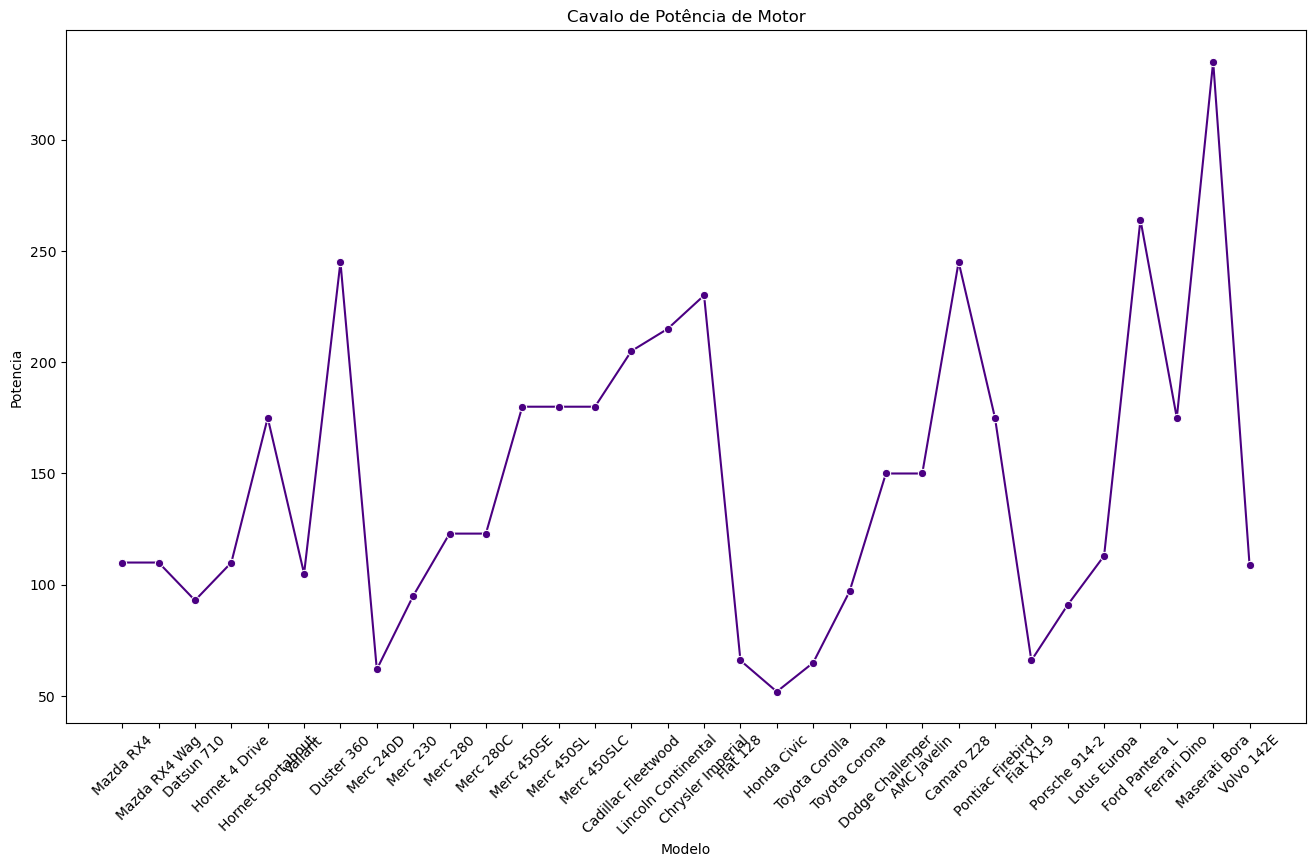

In [170]:
plt.figure(figsize=(16,9)) 
sns.lineplot(x='Modelo', y='Potencia', data=base, marker='o', color='indigo') 
plt.title('Cavalo de Potência de Motor')
plt.xticks(base.Modelo.unique(), rotation=45) 
plt.show()

* No código seguinte, estamos utilizando a biblioteca `Matplotlib` para criar um gráfico de barras horizontais. Os dados de modelos de carros ('`Modelo`') e suas potências ('`Potencia`') são extraídos de um DataFrame chamado '`base`'. Em seguida, um gráfico de barras horizontais é gerado, representando visualmente a relação entre os modelos e suas potências. O tamanho da figura é ajustado para 12 x 9, as barras são coloridas em azul claro ('`dodgerblue`'), e uma borda preta é adicionada para melhor contraste. O título do gráfico é definido como '`Cavalo de Potência de Motor`'. A visualização resultante fornece uma representação clara das potências dos diferentes modelos de carros.

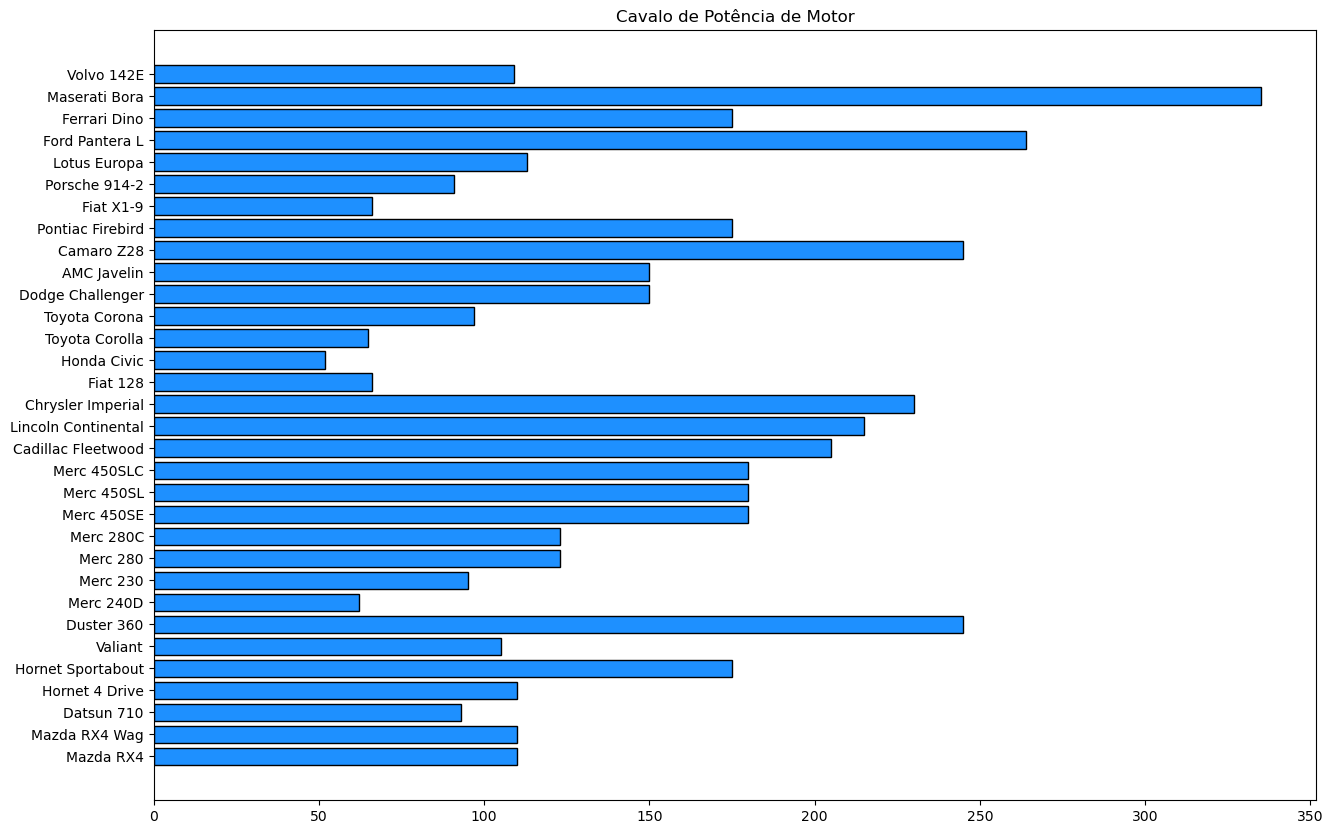

In [171]:
x=base['Modelo'].values
y=base['Potencia'].values
fig, ax = plt.subplots(figsize =(15, 10))   

ax.barh(x, y, color='dodgerblue', edgecolor=(0,0,0)) 
ax.set_title('Cavalo de Potência de Motor') 
plt.show() 

### <font color=orange>Analisando a Relação Existente entre as Variáveis Numéricas da Base de Dados</font>

* No código fornecido a seguir, está sendo utilizado o módulo `seaborn` para criar um mapa de calor (`heatmap`) com base nas correlações entre as variáveis numéricas do conjunto de dados (`base`). O parâmetro `cmap="Reds"` define a paleta de cores vermelhas para representar as intensidades das correlações. O tamanho da figura é ajustado para 15x10 unidades com `plt.figure(figsize=(15,10))`. O código visa visualizar de forma eficaz as relações entre as variáveis numéricas por meio de tonalidades de vermelho no mapa de calor.

<Axes: >

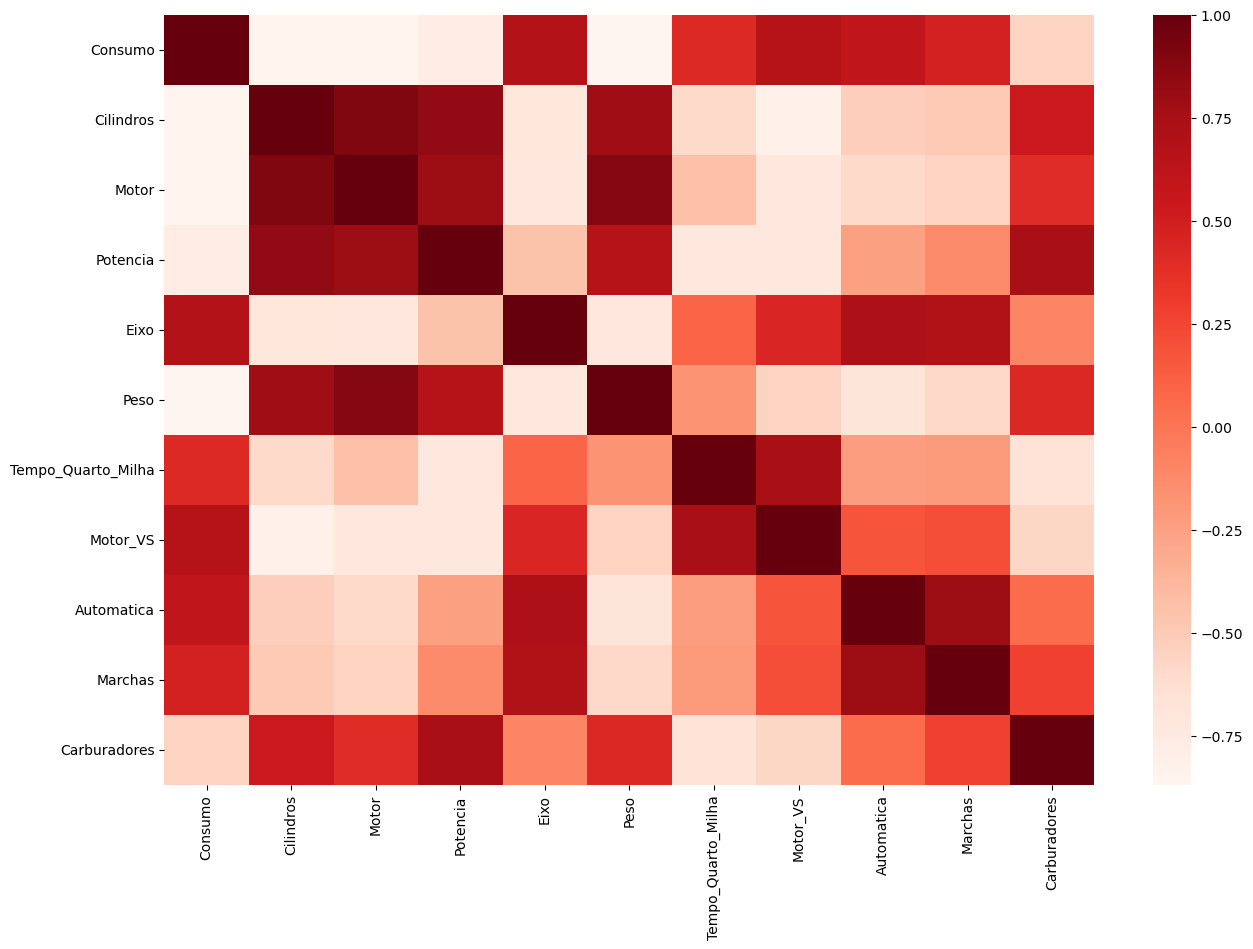

In [172]:
plt.figure(figsize=(15,10))
sns.heatmap(base.corr(numeric_only=True), cmap="Reds")

No código seguinte, usamos a função "`describe()`" é aplicada ao objeto "`Potencia`" da base de dados. Essa função é comumente utilizada em análise de dados com o Pandas e fornece estatísticas descritivas, como média, desvio padrão e quartis, para a variável "`Potencia`". Essa abordagem simplificada permite uma visão rápida e resumida das características da variável, facilitando a compreensão de seu comportamento no contexto da análise de dados.

In [173]:
base.Potencia.describe()

count     32.000000
mean     146.687500
std       68.562868
min       52.000000
25%       96.500000
50%      123.000000
75%      180.000000
max      335.000000
Name: Potencia, dtype: float64

* No código seguinte, a variável '`base`' é ordenada de acordo com a coluna '`Potencia`' em ordem decrescente usando o método '`sort_values`'. Em seguida, a variável '`ordered`' é reindexada com '`reset_index`', removendo o índice anterior. O resultado é a exibição da estrutura de dados ordenada. É essencial notar que o método '`sort_values`' altera a ordem da variável original, então se a preservação da ordem original for necessária, é recomendável criar uma cópia antes de ordenar.

In [177]:
ordered=base.sort_values(by=['Potencia'], ascending=False)
ordered=ordered.reset_index(drop=True)
ordered

,Modelo,Consumo,Cilindros,Motor,Potencia,Eixo,Peso,Tempo_Quarto_Milha,Motor_VS,Automatica,Marchas,Carburadores
0,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
1,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
2,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
3,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
4,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
5,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
6,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
7,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
8,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
9,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3


* No código Python fornecido, está sendo criado um gráfico de linha usando a biblioteca Seaborn. O gráfico representa a relação entre os modelos de carros (eixo x) e a potência de seus motores (eixo y), com pontos marcados por 'o' e coloração indigo. A figura tem dimensões de 16 por 9, e o título é definido como 'Cavalo de Potência de Motor Decrescente'. Os rótulos no eixo x são os modelos ordenados, apresentados com uma rotação de 45 graus para melhor legibilidade. O resultado visualiza a variação da potência dos motores em relação aos diferentes modelos de forma clara e concisa.

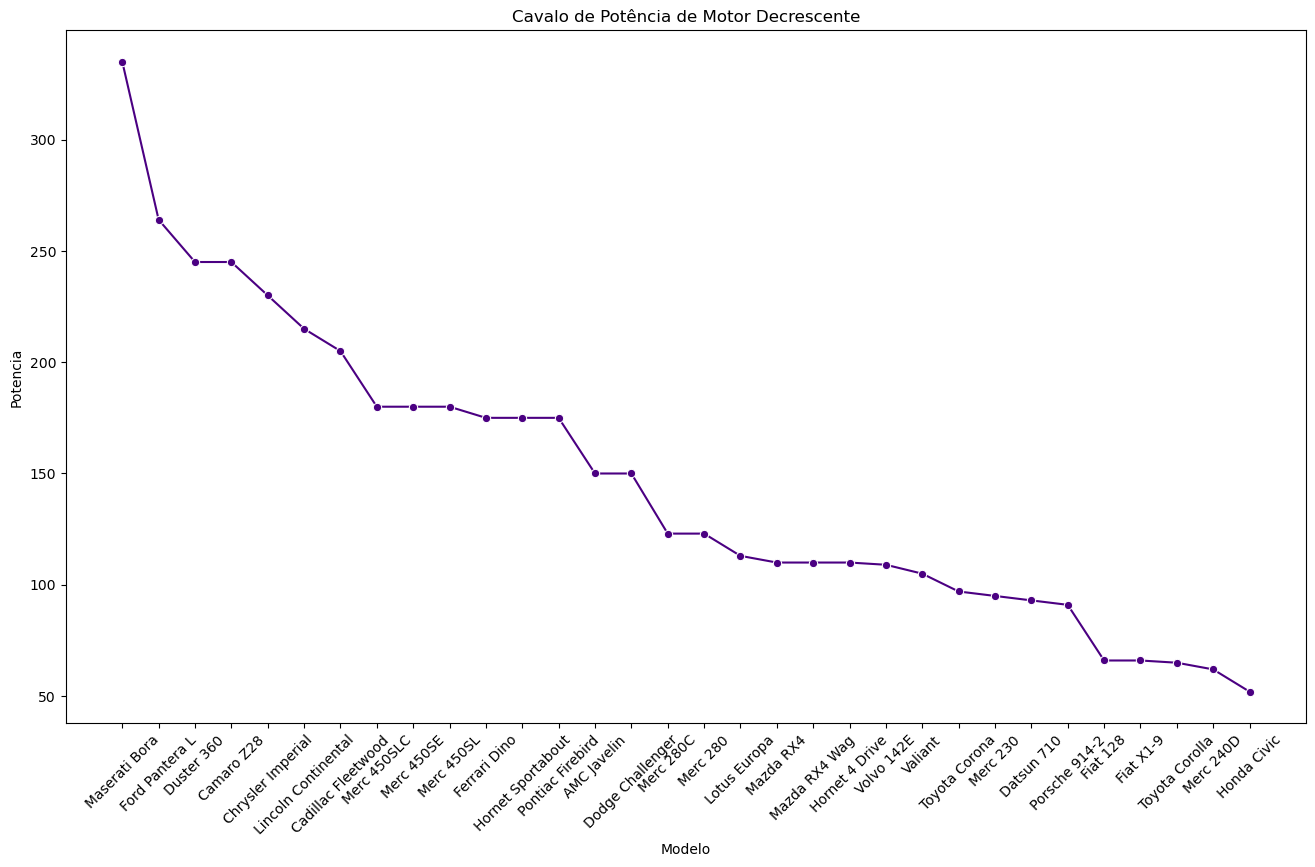

In [175]:
plt.figure(figsize=(16,9)) 
sns.lineplot(x='Modelo', y='Potencia', data=ordered, marker='o', color='indigo') 
plt.title('Cavalo de Potência de Motor Decrescente')
plt.xticks(ordered.Modelo.unique(), rotation=45) 
plt.show()

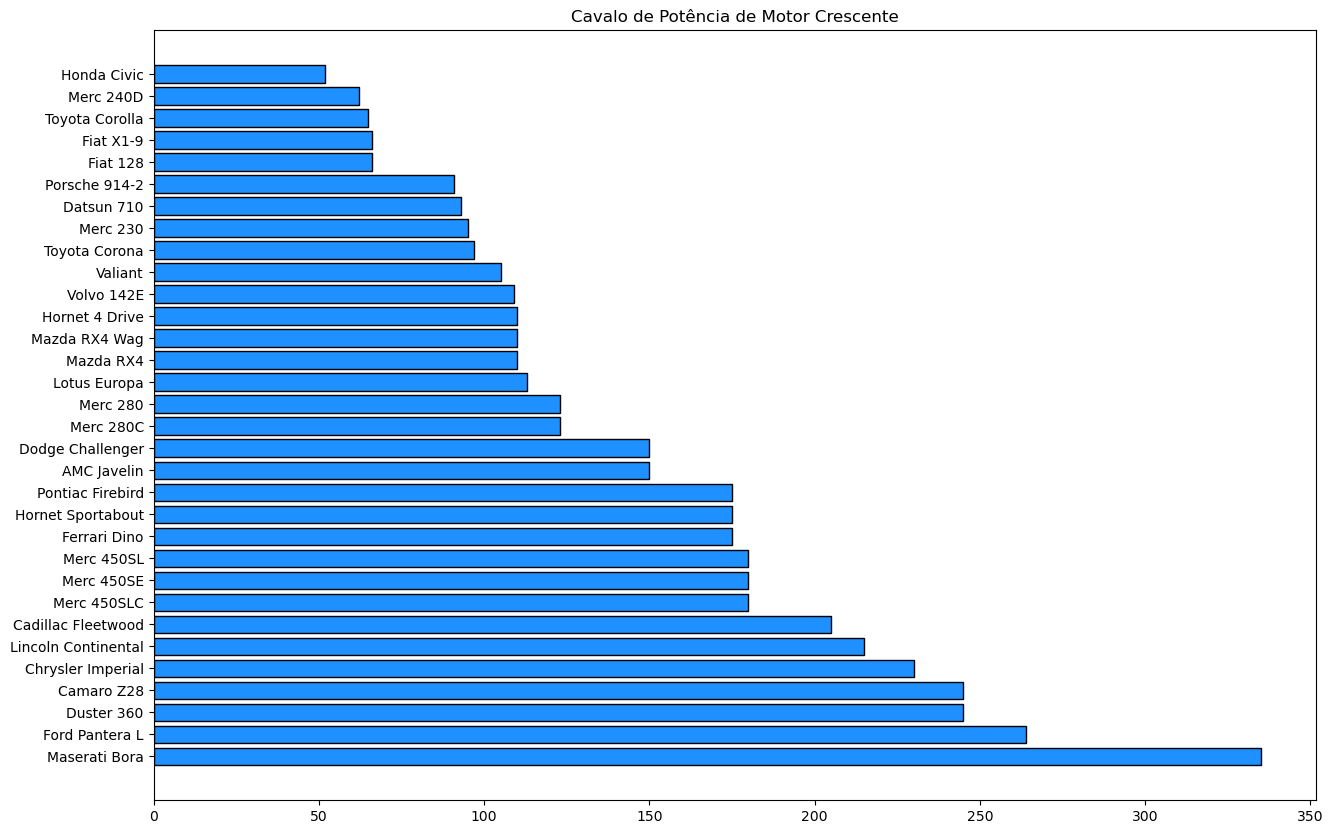

In [176]:
x=ordered['Modelo'].values
y=ordered['Potencia'].values
fig, ax = plt.subplots(figsize =(15, 10))   

ax.barh(x, y, color='dodgerblue', edgecolor=(0,0,0)) 
ax.set_title('Cavalo de Potência de Motor Crescente') 
plt.show() 

### <font color=orange>Limpando e Preparando o Dataframe para Análises Posteriores</font>

* Neste código, estou removendo a coluna '`Modelo`' do DataFrame '`base`' utilizando a função '`drop`' com o parâmetro '`axis`' definido como 1, o que indica que a operação será realizada ao longo das colunas. Isso resulta na exclusão dessa coluna específica do conjunto de dados, ajudando a limpar e preparar o DataFrame para análises posteriores. O método '`head()`' é utilizado para exibir as primeiras linhas depois da limpeza do DataFrame, oferecendo uma rápida visão geral dos dados recém-formatados novamente.

In [178]:
base = base.drop(['Modelo'], axis = 1)
base.head()

,Consumo,Cilindros,Motor,Potencia,Eixo,Peso,Tempo_Quarto_Milha,Motor_VS,Automatica,Marchas,Carburadores
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### <font color=orange>Realizando a Análise de Correlação entre 2 Variáveis</font>

* No código a sdguir, estamos realizando uma análise de correlação entre duas variáveis em um conjunto de dados representado pela variável '`base`'. Primeiro, estamos selecionando a terceira coluna (índice 2) e armazenando-a na variável '`col_motor`', que parece representar a variável '`Motor`'. Em seguida, selecionamos a primeira coluna (índice 0) e a armazenamos na variável '`col_consumo`', que provavelmente corresponde à variável '`Consumo`'. Em seguida, calculamos a correlação entre '`col_motor`' e '`col_consumo`' usando a função '`np.corrcoef`' e armazenamos o resultado na variável '`correlacao`'. Esse código nos ajuda a entender a relação entre as variáveis por meio do coeficiente de correlação.

In [179]:
col_motor = base.iloc[:, 2].values
col_consumo = base.iloc[:, 0].values
correlacao = np.corrcoef(col_motor, col_consumo)
print(correlacao)

[[ 1.         -0.84755138]
 [-0.84755138  1.        ]]


### <font color=orange>Formatando uma Variável para o Formato de Matriz</font>

* Nesse código, a variável `col_motor` está sendo redimensionada usando a função "`reshape`". O argumento (-1, 1) indica que estamos alterando a forma de `col_motor` para que ele tenha uma única coluna, enquanto o valor -1 é usado para que o número de linhas seja ajustado automaticamente para manter os dados originais. Isso é útil, por exemplo, ao preparar dados para modelos de machine learning que requerem uma matriz bidimensional, como regressão linear, onde uma única coluna representa uma característica.

In [180]:
col_motor_format = col_motor.reshape(-1, 1)

### <font color=orange>Criando um Modelo, Treinando e Visualizando os Coeficientes e Score do Modelo</font>

* Nesse código, estou utilizando a biblioteca de aprendizado de máquina do Python, onde criei um modelo de *regressão linear* usando a classe `LinearRegression()`. Em seguida, ajustei esse modelo aos dados de entrada (`col_motor_format`) e às saídas desejadas (`col_consumo`) por meio do método `fit()`. Isso significa que estou treinando o modelo para encontrar uma relação linear entre os dados de entrada e as saídas, o que é útil para previsões e análises estatísticas.

In [181]:
modelo = LinearRegression()
modelo.fit(col_motor_format, col_consumo)

LinearRegression()

### <font color=orange>Obtendo o Valor de Interceptação do Modelo</font>

* O código "`modelo.intercept_`" refere-se a uma propriedade em um modelo de *machine learning*. Essa linha de código provavelmente está sendo usada para acessar o valor do termo independente (`interceptação`) calculado pelo modelo. Esse valor representa o ponto em que a linha de regressão cruza o eixo vertical (`col_consumo`) e é fundamental para a previsão do modelo. Em resumo, "`modelo.intercept_`" fornece o valor da intercepção do modelo, que é crucial para entender como o modelo faz suas previsões.

In [182]:
modelo.intercept_

29.59985475616395

### <font color=orange>Obtendo os Coeficientes de um Modelo de Regressão Linear</font>

* O código "`modelo.coef_`" refere-se à obtenção dos coeficientes de um modelo de regressão linear em Python. Esses coeficientes representam as contribuições de cada variável independente para a previsão da variável dependente. Ao usar essa linha de código, estamos acessando e extraindo esses coeficientes do modelo treinado, permitindo-nos entender o impacto relativo de cada variável no resultado da regressão. Essa informação é valiosa para análises estatísticas e tomada de decisões em aplicações de machine learning.

In [183]:
modelo.coef_

array([-0.04121512])

### <font color=orange>Avaliando o Desempenho do Modelo de Machine Learning Previamente Treinado</font>

* No trecho de código apresentado a seguir, estamos avaliando o desempenho de um modelo de machine learning. O "`modelo`" representa o modelo previamente treinado, enquanto "`col_motor_format`" e "`col_consumo`" são os conjuntos de dados de entrada e saída, respectivamente. A função "`score`" calcula a *precisão* ou *métrica de desempenho* do modelo em relação aos dados de teste (`col_motor_format`) e seus rótulos reais (`col_consumo`), fornecendo uma medida numérica que indica o quão bem o modelo faz previsões corretas com base nos dados fornecidos. *Quanto mais próximo de 1 for o resultado, melhor o desempenho do modelo*.

In [184]:
modelo.score(col_motor_format, col_consumo)

0.7183433404897299

### <font color=orange>Gerando e Verificando os Resultados das Previsões Geradas pelo Modelo Criado</font>

* No código seguinte, a variável "`previsoes`" é criada e usada para armazenar as previsões geradas por um *modelo de machine learning* ao aplicá-lo aos dados contidos na variável "`col_motor_format`". Após realizar as previsões, o código simplesmente exibe o conteúdo da variável "`previsoes`". Essa abordagem é comumente usada para verificar os resultados das previsões geradas pelo modelo em questão.

In [185]:
previsoes = modelo.predict(col_motor_format)
previsoes

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

### <font color=orange>Criando e Analisando um outro Modelo de Regressão Linear Ajustado</font>

* No código seguinte, estamos realizando uma *Análise de Regressão Linear* simples utilizando a biblioteca StatsModels (sm). Primeiro, definimos o modelo de regressão com a fórmula '`Motor ~ Consumo`', onde '`Motor`' representa a variável dependente e '`Consumo`' a variável independente. Em seguida, ajustamos o modelo aos dados com a função '`fit()`' e armazenamos o modelo treinado em '`modelo_treinado`'. Por fim, imprimimos um resumo estatístico do modelo com '`modelo_treinado.summary()`', que inclui informações cruciais sobre a qualidade do ajuste e a relação entre as variáveis.

In [186]:
modelo_ajustado = sm.ols(formula = 'Motor ~ Consumo', data = base)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Motor   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           9.38e-10
Time:                        18:11:59   Log-Likelihood:                -178.86
No. Observations:                  32   AIC:                             361.7
Df Residuals:                      30   BIC:                             364.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    580.8838     41.740     13.917      0.000     495.639     666.128
Consumo      -17.4291      1.993     -8.747      0.000     -21.498     -13.360
==============================================================================
Omnibus:                        1.275   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.529   Jarque-Bera (JB):                1.234
Skew:                           0.389   Prob(JB):                        0.539
Kurtosis:                       2.434   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A tabela acima é a saída de uma análise de regressão linear por mínimos quadrados ordinários (OLS). 
A `Regressão OLS` é um método estatístico que é usado para ajustar uma relação linear entre uma variável dependente (`Consumo`) e uma ou mais variáveis independentes (`Motor`).

A tabela mostra os seguintes resultados da regressão OLS:

- O valor de R é 0,718, o que significa que 71,8% da variação em `Consumo` pode ser explicada pela variação em `Motor`.
- O valor de R ajustado é 0,709, que é uma estimativa ligeiramente mais conservadora da variação explicada.
- O F-statistic é 76,51, o que é estatisticamente significativo, indicando que a relação linear entre `Consumo` e `Motor` é significativa.
- O p-valor para o coeficiente de `Motor` é 0,000, o que também é estatisticamente significativo, indicando que o coeficiente de `Motor` não é igual a zero.
- Os intervalos de confiança de 95% para os coeficientes de intercepto e `Motor` são (27,088, 32,111) e (-0,051, -0,032), respectivamente.
- O teste Omnibus não é significativo, indicando que os resíduos são distribuídos normalmente.
- O estatístico de Durbin-Watson é 1,539, que está dentro da faixa aceitável de 1,5 a 2,5.
- O teste de Jarque-Bera não é significativo, indicando que os resíduos não são significativamente enviesados ​​ou achatados.
- O número de condição é 539, o que é alto, indicando que o modelo pode ser sensível a outliers.
- No geral, os resultados da regressão OLS indicam que há uma relação linear significativa entre `Consumo` e `Motor`. 
- O coeficiente de `Motor` é negativo, o que significa que um aumento em `Motor` está associado a uma diminuição em `Consumo`.

É importante observar que os resultados da regressão OLS são válidos apenas para os dados que foram usados ​​para ajustar o modelo. Se você usar o modelo para prever `Consumo` para novos dados, as previsões podem não ser precisas.

Explicação dos resultados

- O valor de R é uma medida de quão bem o modelo se ajusta aos dados. 
- Um valor de R próximo de 1 indica que o modelo se ajusta muito bem aos dados.
- O F-statistic é um teste de significância que mede a força da relação entre a variável dependente e as variáveis

### <font color=orange>Criando e Visualizando um Gráfico de Dispersão</font>

* O código seguinte, utiliza a biblioteca `matplotlib` para criar um gráfico de dispersão (`scatter` `plot`) com os pontos de dados representados por `col_motor_format` e `col_consumo`, e em seguida, traça uma linha vermelha (color = '`red`') que representa as previsões (previsoes) em relação aos dados. É uma maneira visual de mostrar como as previsões se comparam aos valores reais, facilitando a análise de desempenho de um modelo ou algoritmo.

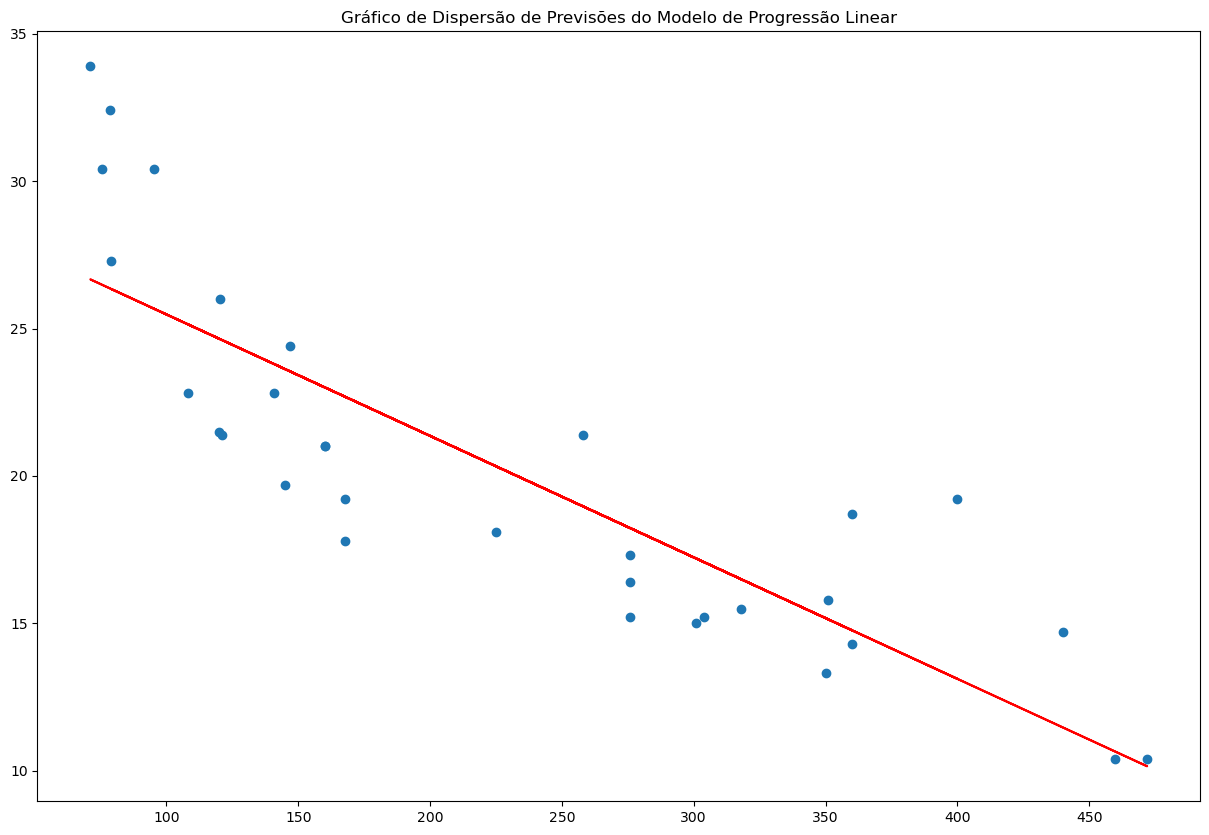

In [192]:
plt.subplots(figsize =(15, 10))   
plt.title('Gráfico de Dispersão de Previsões do Modelo de Progressão Linear')
plt.scatter(col_motor_format, col_consumo)
plt.plot(col_motor_format, previsoes, color = 'red')

### <font color=orange>Realizando a Previsão para Somente um Determinado Valor</font>

* No código a seguir, utilizamos o modelo de previsão para fazer uma estimativa com base em um determinado valor de entrada com o modelo que faz parte do projeto de análise de dados ou aprendizado de máquina. O "`modelo.predict`" é usado para calcular um resultado previsto com base na entrada numérica fornecida. E em seguida, é visualizado por meio da linha `print(previsao)`.

In [193]:
previsao = modelo.predict([[200]])
print(previsao)

[21.35683076]


### <font color=orange>Realizando a Análise de Correlação entre 4 Variáveis</font>

* No código seguinte, a variável `matriz_x` está sendo criada a partir da seleção de um subconjunto dos dados contidos na variável '`base`'. O iloc[:, 1:4] indica que estamos selecionando todas as linhas (':' representa todas as linhas) e as colunas da 1ª à 3ª (índices 1, 2 e 3) da matriz de dados '`base`'. Em seguida, .values transforma essa seleção em um array `NumPy`. Portanto, a variável `matriz_x` agora contém os dados dessas colunas específicas da '`base`'.

In [194]:
matriz_x = base.iloc[:, 1:4].values
matriz_x

array([[  6. , 160. , 110. ],
       [  6. , 160. , 110. ],
       [  4. , 108. ,  93. ],
       [  6. , 258. , 110. ],
       [  8. , 360. , 175. ],
       [  6. , 225. , 105. ],
       [  8. , 360. , 245. ],
       [  4. , 146.7,  62. ],
       [  4. , 140.8,  95. ],
       [  6. , 167.6, 123. ],
       [  6. , 167.6, 123. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 472. , 205. ],
       [  8. , 460. , 215. ],
       [  8. , 440. , 230. ],
       [  4. ,  78.7,  66. ],
       [  4. ,  75.7,  52. ],
       [  4. ,  71.1,  65. ],
       [  4. , 120.1,  97. ],
       [  8. , 318. , 150. ],
       [  8. , 304. , 150. ],
       [  8. , 350. , 245. ],
       [  8. , 400. , 175. ],
       [  4. ,  79. ,  66. ],
       [  4. , 120.3,  91. ],
       [  4. ,  95.1, 113. ],
       [  8. , 351. , 264. ],
       [  6. , 145. , 175. ],
       [  8. , 301. , 335. ],
       [  4. , 121. , 109. ]])

### <font color=orange>Criando e Realizando Outro Modelo de Regressão Linear</font>

* No código a seguir, estamos realizando a criação de um *`Modelo de Regressão Linear`* com o uso da biblioteca scikit-learn em Python. Primeiro, definimos uma variável `col_consumo_y` que contém os valores da primeira coluna da base de dados. Em seguida, criamos um modelo de regressão linear chamado `modelo2` e o treinamos com os dados de entrada `matriz_x` e a variável de saída `col_consumo_y`. Por fim, calculamos o coeficiente de determinação (`R`) do modelo para avaliar o quão bem ele se ajusta aos dados, usando o método modelo2.score(`matriz_x`, `col_consumo_y`). Esse coeficiente varia de 0 a 1, indicando o quão bem o modelo representa os dados, onde valores mais próximos de 1 indicam um ajuste melhor.

In [195]:
col_consumo_y  = base.iloc[:, 0].values
modelo2 = LinearRegression()
modelo2.fit( matriz_x, col_consumo_y )
modelo2.score(matriz_x, col_consumo_y )

0.7678877440928639

### <font color=orange>Criando um Modelo Ajustado com mais Atributos (Regressão Linear Múltipla)</font>

* No código seguinte, estamos realizando uma análise de regressão linear usando a biblioteca `Statsmodels` (sm) em Python. Primeiro, definimos um modelo (`modelo_ajustado2`) com a fórmula '`Consumo` ~ `Cilindros` + `Motor` + `Potencia`', indicando que estamos prevendo a variável '`Consumo`' com base nas variáveis independentes '`Cilindros`', '`Motor`' e '`Potencia`'. Em seguida, treinamos o modelo com os dados fornecidos (base) usando o método `.fit()` e armazenamos os resultados em `modelo_treinado2`. Por fim, exibimos um resumo estatístico do modelo com o método `.summary()`, o que nos fornece informações detalhadas sobre os coeficientes, estatísticas de ajuste e significância das variáveis explicativas no modelo de regressão.

In [196]:
modelo_ajustado2 = sm.ols(formula = 'Consumo ~ Cilindros + Motor + Potencia', data = base)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Consumo   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           5.05e-09
Time:                        18:19:24   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
Cilindros     -1.2274      0.797     -1.540      0.135      -2.861       0.406
Motor         -0.0188      0.010     -1.811      0.081      -0.040       0.002
Potencia      -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- A tabela mostra que uma regressão linear foi realizada para prever o consumo de combustível (`Consumo`) de um carro com base no número de cilindros (`Cilindros`), cilindrada (`Motor`) e potência do motor (`Potencia`).

- Os resultados da regressão indicam que o modelo `R` explica `76,8%` da variação no consumo de combustível. Os coeficientes dos três parâmetros são estatisticamente significativos, o que significa que eles têm um impacto significativo no consumo de combustível. Em outras palavras, `76,8%` do consumo de combustível pode ser explicado pelos três parâmetros do modelo: *número de cilindros, cilindrada e potência do motor*.

- É importante notar que o valor de `R` não é uma medida de precisão. Ele simplesmente mede o quanto do consumo de combustível pode ser explicado pelo modelo. A precisão das previsões do modelo depende de outros fatores, como a qualidade dos dados e a presença de outliers.

- O coeficiente do número de cilindros é negativo, o que significa que um carro com mais cilindros tem um consumo de combustível maior. O coeficiente da cilindrada também é negativo, o que significa que um carro com maior cilindrada também tem um consumo de combustível maior. O coeficiente da potência do motor é positivo, o que significa que um carro com mais potência tem um consumo de combustível menor.

- É importante notar que os resultados da regressão são apenas validos para os dados que foram usados para treinar o modelo. Se você usar o modelo para prever o consumo de combustível de um carro que não está nos dados, as previsões podem não ser precisas.

### <font color=orange>Realizando a Previsão Baseado com 3 Valores de Entradas</font>

* No código seguinte, estamos usando a biblioteca `NumPy` para criar um novo array com os valores `Cilindros` + `Motor` + `Potencia` equivalentes a `[4, 200, 100]`. Em seguida, usamos o método '`reshape`' para ajustar a forma desse array para uma matriz com uma única linha e o número correto de colunas, que é determinado automaticamente pelo valor -1. Por fim, aplicamos um modelo chamado '`modelo2`' para fazer uma previsão com base no novo array, o que pode representar uma entrada para um modelo de aprendizado de máquina, retornando o resultado da previsão.

In [202]:
novo_modelo = np.array([4, 200, 100])
novo_modelo = novo_modelo.reshape(1, -1)
nova_previsao = modelo2.predict(novo_modelo)
print(f'Previsão do consumo: {nova_previsao}')

Previsão do consumo: [24.03968887]
